# Logistic Regression for One Variable

In [1]:
import collections
import math
import random
import time

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab
import scipy
import seaborn as sns
import sklearn
from sklearn import *
import statsmodels as sm

np.random.seed(1337)

%matplotlib inline

sns.set(font_scale=1.3)
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette('muted'))

fsize=(20.0, 15.0)
linewidth = 1.0
dotsize = 15

### Generate sample data

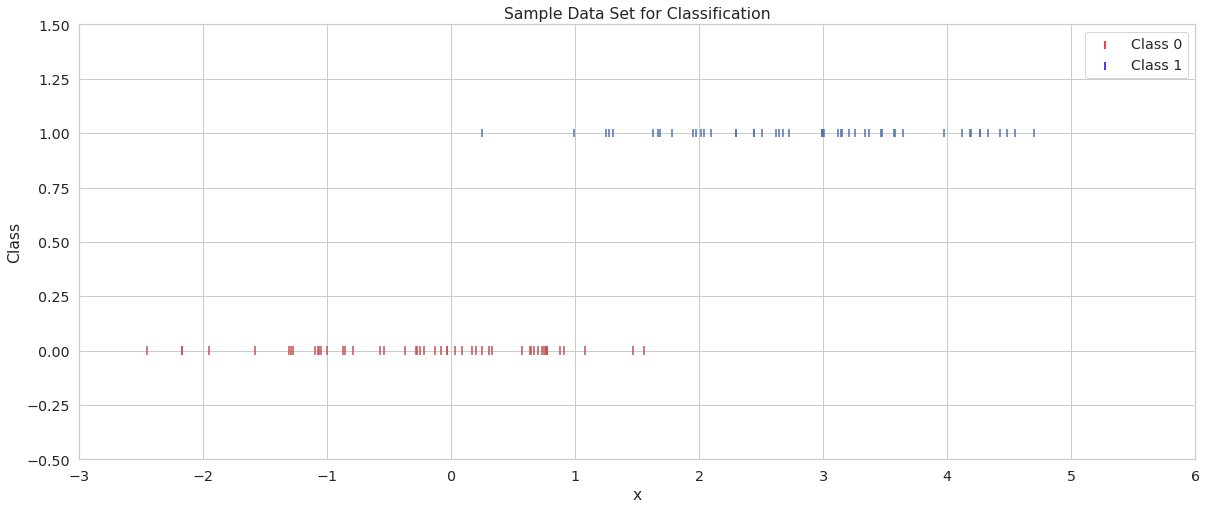

In [2]:
n_points = 50

d_pos = pd.DataFrame({
            'x': np.random.randn(n_points) + 3,
            't': [1] * n_points})

d_neg = pd.DataFrame({
            'x': np.random.randn(n_points),
            't': [0] * n_points})

d = pd.concat([d_pos, d_neg])

colors = {0: 'r', 1: 'b'}

_ = plt.figure(figsize=(20, 8))
_ = plt.scatter(d.x, d.t, c=d.t.map(colors), marker='|', s=dotsize*5, label=None)
_ = plt.scatter([], [], c='red', marker='|', s=dotsize*5, label='Class 0')
_ = plt.scatter([], [], c='blue', marker='|', s=dotsize*5, label='Class 1')
_ = plt.legend(loc='upper right')
_ = plt.xlim((-3, 6))
_ = plt.ylim((-0.5, 1.5))
_ = plt.xlabel('x')
_ = plt.ylabel('Class')
_ = plt.title("Sample Data Set for Classification")

### Classification with Logistic Regression

intercept:    -3.194687051814792
coefficient:  2.539863344408202


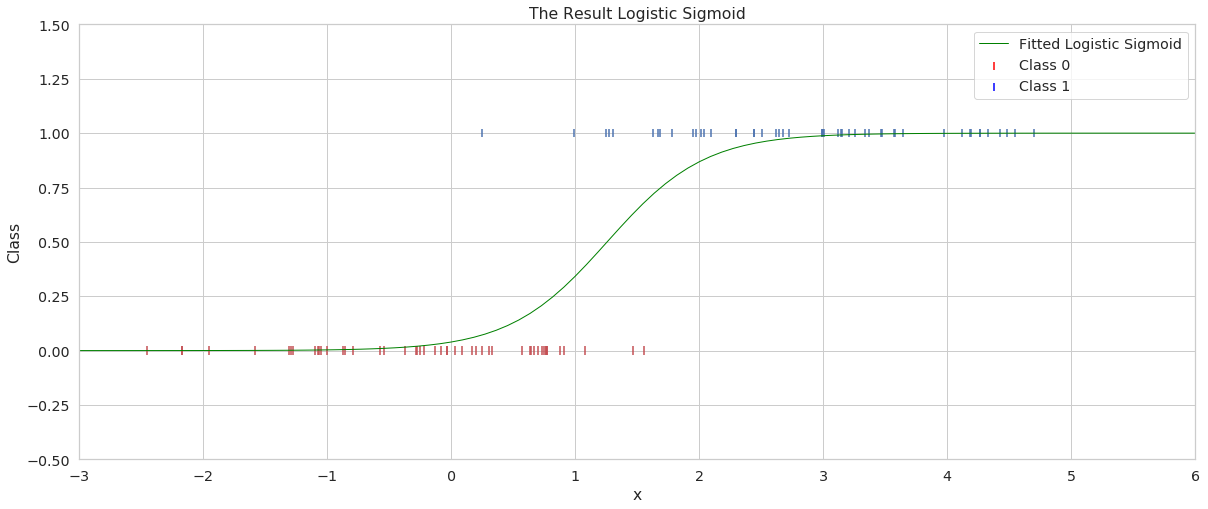

In [3]:
model = sklearn.linear_model.LogisticRegression(solver='lbfgs')

model.fit(d[['x']], d.t)

def logistic_function(x):
    return 1 / (1 + np.exp(-x))

fitted_logistic = pd.DataFrame({'x': np.linspace(-3, 6, 100)})
fitted_logistic['y'] = [logistic_function(x * model.coef_ + model.intercept_) for x in fitted_logistic.x]

print('intercept:   ', model.intercept_[0])
print('coefficient: ', model.coef_[0][0])

_ = plt.figure(figsize=(20, 8))
_ = plt.scatter(d.x, d.t, c=d.t.map(colors), marker='|', s=dotsize*5, label=None)
_ = plt.scatter([], [], c='red', marker='|', s=dotsize*5, label='Class 0')
_ = plt.scatter([], [], c='blue', marker='|', s=dotsize*5, label='Class 1')
_ = plt.plot(fitted_logistic.x, fitted_logistic.y, c='green', linewidth=linewidth, label='Fitted Logistic Sigmoid')
_ = plt.legend(loc='upper right')
_ = plt.xlim((-3, 6))
_ = plt.ylim((-0.5, 1.5))
_ = plt.xlabel('x')
_ = plt.ylabel('Class')
_ = plt.title("The Result Logistic Sigmoid")